# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БФИ2001 Лушин Евгений Александрович
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

**Алгоритм Флойда-Уоршелла**| **Алгоритм Дейкстры** | **Алгоритм Беллмана-Форда** | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [1]:
import sys
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy

### 1) Алгоритм Флойда-Уоршелла

Найден следующий лучший маршрут с ценностью 26.
A -> B -> E -> I


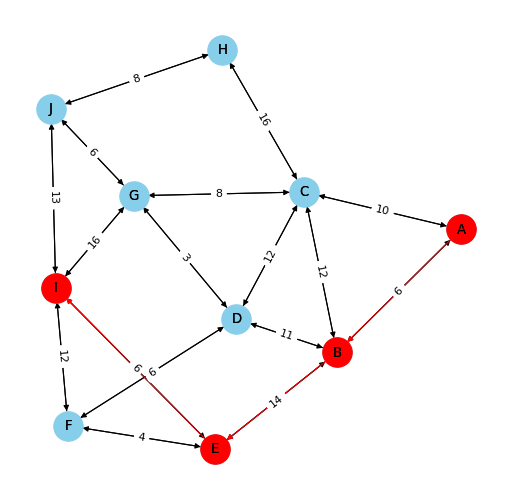

In [2]:
def print_graph(matrix, path):
    G = nx.DiGraph()
    H = nx.DiGraph()
    for el1, vector in enumerate(matrix):
        for el2, w in enumerate(vector):
            if w > 0:
                G.add_edge(chr(el1+65), chr(el2+65), weight=w)
    for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]:
                        H.add_edge(chr(el1+65), chr(el2+65), weight=w)
    edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
    node_labels = {node:node for node in G.nodes()}

    # Установка параметров вывода
    plt.figure(num=None, figsize=(8, 8), dpi=80)
    pos = nx.spring_layout(G)
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw(G, pos, node_size = 700, node_color = '#87CEEB')

    nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(H, pos, labels=node_labels)
    nx.draw(H, pos, node_size = 700, node_color = '#FF0000', edge_color='#FF0000')

    plt.show()

def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix

def get_path(P, u, v):
    path = [u]
    while u != v:
        u = P[u][v]
        path.append(u)
    return path

def Floyd_Warshell():
    V = read_matrix('../Lab6_matrix/1.txt')
    for i, vector in enumerate(V):
        for j, w in enumerate(vector):
            if V[i][j] == 9999:
                V[i][j] = math.inf
    N = len(V)                       # число вершин в графе
    P = [[v for v in range(N)] for u in range(N)]       # начальный список предыдущих вершин для поиска кратчайших маршрутов
    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = V[i][k] + V[k][j]
                if V[i][j] > d:
                    V[i][j] = d
                    P[i][j] = k     # номер промежуточной вершины при движении от i к j
    return P

# нумерацця вершин начинается с нуля
matrix = read_matrix('../Lab6_matrix/1.txt')

for i, vector in enumerate(matrix):
    for j, w in enumerate(vector):
        if matrix[i][j] == 9999:
            matrix[i][j] = 0

start = ord('A')-65
end = ord('I')-65
path = get_path(Floyd_Warshell(), end, start)

path.reverse()

count = 0
for i in range(len(path)-1):
        for el1, vector in enumerate(matrix):
            if el1 == path[i]:
                for el2, w in enumerate(vector):
                    if el2 == path[i+1]:
                        count = count + w
print("Найден следующий лучший маршрут с ценностью {}.".format(count))

shortcut = copy.deepcopy(path)
for i in range (len(shortcut)):
        shortcut[i] = chr(shortcut[i]+65)
print(" -> ".join(shortcut))

print_graph(matrix, path)

### 2) Алгоритм Дейкстры

Найден следующий лучший маршрут с ценностью 26.
A -> B -> E -> I


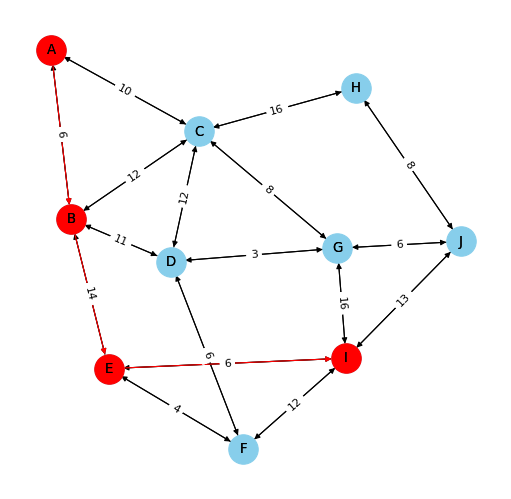

In [3]:
class Graph(object):
    def __init__(self, nodes, init_graph):
        self.nodes = nodes
        self.graph = self.construct_graph(nodes, init_graph)
        
    def construct_graph(self, nodes, init_graph):
      #  Этот метод гарантирует, что график симметричен (если есть путь от узла A до B со значением V, то
      #  должен быть путь от узла B до узла A со значением V)
        graph = {}
        for node in nodes:
            graph[node] = {}
        graph.update(init_graph)
        for node, edges in graph.items():
            for adjacent_node, value in edges.items():
                if graph[adjacent_node].get(node, False) == False:
                    graph[adjacent_node][node] = value
        return graph
    
    def get_nodes(self):
       # Возвращает узлы графа
        return self.nodes
    
    def get_outgoing_edges(self, node):
        # Возвращает соседей узла
        connections = []
        for out_node in self.nodes:
            if self.graph[node].get(out_node, False) != False:
                connections.append(out_node)
        return connections
    
    def value(self, node1, node2):
        # Возвращает значение ребра между двумя узлами
        return self.graph[node1][node2]

    
def dijkstra_algorithm(graph, start_node):
    unvisited_nodes = list(graph.get_nodes())
    
    # Словарь, обновляемый по мере продвижения по графику
    shortest_path = {}
 
    # Словарь, для хранения кратчейшего известного пути к узлу найденному на данный момент
    previous_nodes = {}
 
    # max_value для инициализации большого числа для не посещенных узлов  
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    
    # Значение начального узла инициализируем 0   
    shortest_path[start_node] = 0
    
    # Алгоритм выполняется до тех пор, пока не посетим все узлы
    while unvisited_nodes:
        # Приведенный ниже блок кода находит узел с наименьшим количеством баллов
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # Приведенный ниже блок кода извлекает соседей текущего узла и обновляет их расстояния
        neighbors = graph.get_outgoing_edges(current_min_node)
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # Обновляем наилучший путь к текущему узлу
                previous_nodes[neighbor] = current_min_node
 
        # После посещения его соседей мы помечаем узел как "посещенный"
        unvisited_nodes.remove(current_min_node)
    
    return previous_nodes, shortest_path


def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
    path.append(start_node)
    path.reverse()
    print("Найден следующий лучший маршрут с ценностью {}.".format(shortest_path[target_node]))
    print(" -> ".join(path))
    for i in range (len(path)):
        path[i] = ord(path[i])-65
    return path


def print_graph(input, rez_graph):
    G = nx.DiGraph()
    H = nx.DiGraph()
    for el1, vector in enumerate(input):
        for el2, w in enumerate(vector):
            if w > 0:
                G.add_edge(chr(el1+65), chr(el2+65), weight=w)
    for i in range(len(rez_graph)-1):
        for el1, vector in enumerate(input):
            if el1 == rez_graph[i]:
                for el2, w in enumerate(vector):
                    if el2 == rez_graph[i+1]:
                        H.add_edge(chr(el1+65), chr(el2+65), weight=w)
    edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
    node_labels = {node:node for node in G.nodes()}

    # Установка параметров вывода
    plt.figure(num=None, figsize=(8, 8), dpi=80)
    pos = nx.spring_layout(G)
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw(G, pos, node_size = 700, node_color = '#87CEEB')

    nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(H, pos, labels=node_labels)
    nx.draw(H, pos, node_size = 700, node_color = '#FF0000', edge_color='#FF0000')

    plt.show()

def read_matrix(filename):
    # Чтение из файла
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix



matrix = read_matrix('../Lab6_matrix/2.txt')

nodes = []
for el1, vector in enumerate(matrix):
    nodes.append(chr(el1+65))

init_graph = {}
for node in nodes:
    init_graph[node] = {}

for el1, vector in enumerate(matrix):
    for el2, w in enumerate(vector):
        if w > 0:
            init_graph[chr(el1+65)][chr(el2+65)] = w


graph = Graph(nodes, init_graph)
previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node="A")
rez_graph = print_result(previous_nodes, shortest_path, start_node="A", target_node="I")
print_graph(matrix, rez_graph)

### 3) Алгоритм Беллмана-Форда

### Вывод